# EEG analysis in MNE Python

## create epochs and evoked data, re-reference the signal

### Aim: visualize epochs and evokeds

Author: Carina Forster

contact: forster@cbs.mpg.de

last updated 15.07.2024

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#%matplotlib qt
%matplotlib inline

## Events and ERPs

In [3]:
# load the raw data before and after ica cleaning (this is not the liverpool data)
data_dir = Path("C:/", "Users", "Carina", "Desktop", "data_liverpool")
raw = mne.io.read_raw_fif(Path(data_dir, 'before_ica-raw.fif'))
cleaned_raw = mne.io.read_raw_fif(Path(data_dir, 'after_prepro_and_ica-raw.fif'))

Opening raw data file C:\Users\Carina\Desktop\data_liverpool\before_ica-raw.fif...
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Opening raw data file C:\Users\Carina\Desktop\data_liverpool\after_prepro_and_ica-raw.fif...
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


Using matplotlib as 2D backend.


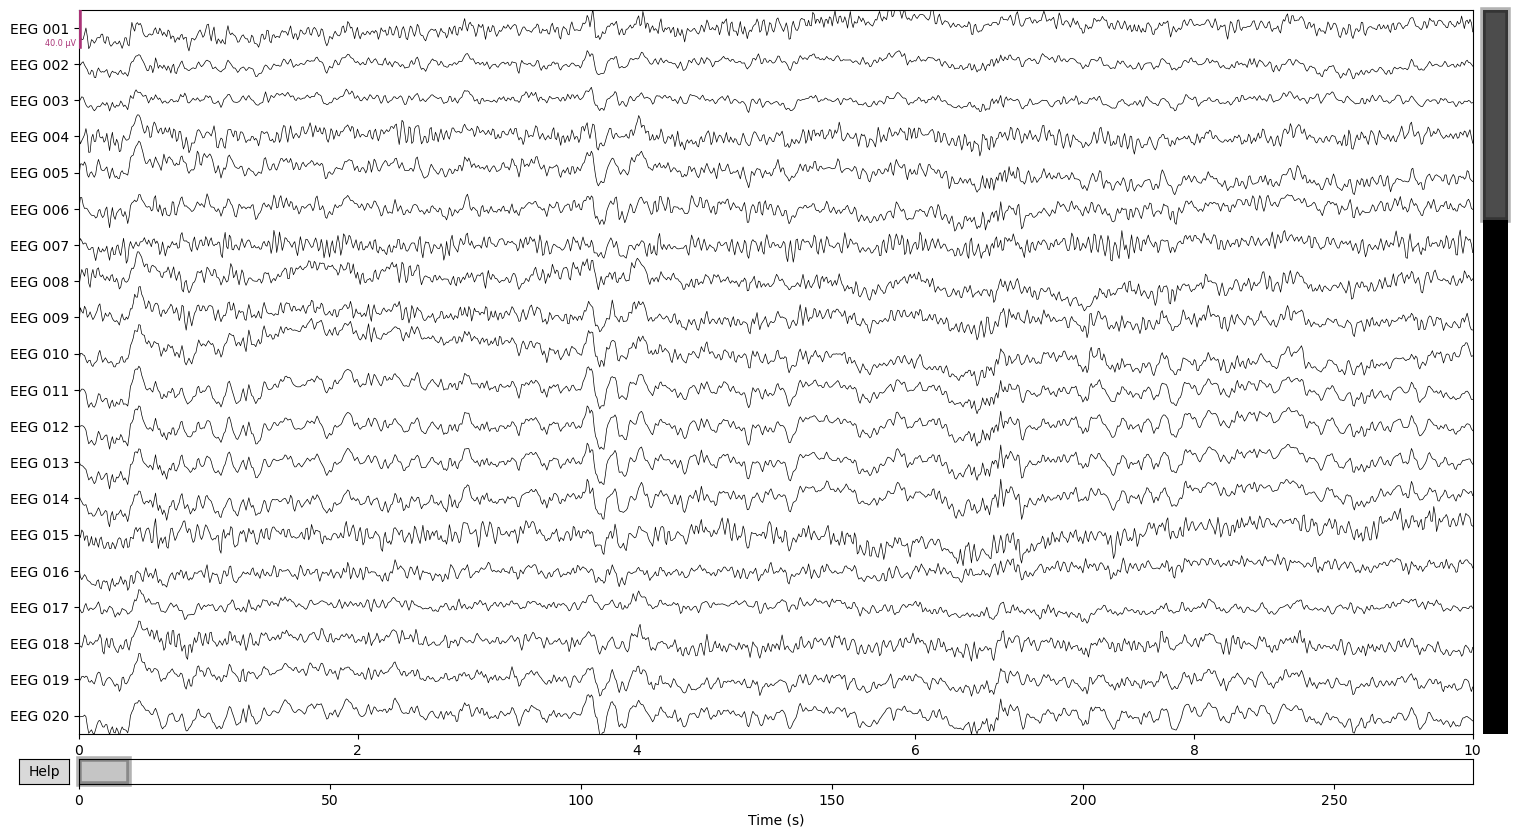

In [6]:
# looks good? 
cleaned_raw.plot();

In [7]:
cleaned_raw.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"9 Stimulus, 59 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,30.00 Hz


<div class="alert alert-block alert-warning">
<b>Discussion:</b>

How can we segment the data? 

based on triggers sent during the EEG recording (e.g. stimulus or response locked)

Why do we segment the data?

because we are usually interested in the  signal after or before a certain event

</div>

In [8]:
# check the channels in that dataset
cleaned_raw.ch_names

['STI 001',
 'STI 002',
 'STI 003',
 'STI 004',
 'STI 005',
 'STI 006',
 'STI 014',
 'STI 015',
 'STI 016',
 'EEG 001',
 'EEG 002',
 'EEG 003',
 'EEG 004',
 'EEG 005',
 'EEG 006',
 'EEG 007',
 'EEG 008',
 'EEG 009',
 'EEG 010',
 'EEG 011',
 'EEG 012',
 'EEG 013',
 'EEG 014',
 'EEG 015',
 'EEG 016',
 'EEG 017',
 'EEG 018',
 'EEG 019',
 'EEG 020',
 'EEG 021',
 'EEG 022',
 'EEG 023',
 'EEG 024',
 'EEG 025',
 'EEG 026',
 'EEG 027',
 'EEG 028',
 'EEG 029',
 'EEG 030',
 'EEG 031',
 'EEG 032',
 'EEG 033',
 'EEG 034',
 'EEG 035',
 'EEG 036',
 'EEG 037',
 'EEG 038',
 'EEG 039',
 'EEG 040',
 'EEG 041',
 'EEG 042',
 'EEG 043',
 'EEG 044',
 'EEG 045',
 'EEG 046',
 'EEG 047',
 'EEG 048',
 'EEG 049',
 'EEG 050',
 'EEG 051',
 'EEG 052',
 'EEG 054',
 'EEG 055',
 'EEG 056',
 'EEG 057',
 'EEG 058',
 'EEG 059',
 'EEG 060',
 'EOG 061']

## Events

In [9]:
# extract event codes from the data if you have a specific channel for the trigger
# usually you only have one trigger channel, but you can have more
# in this case, the trigger channel is called 'STI 014'
events = mne.find_events(cleaned_raw, stim_channel='STI 014')

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


In [44]:
# or use annotations if you used a TTL pulse
#events, events_dict = mne.events_from_annotations(clean_raw)

In [10]:
# let's create a dictionary (also known as hash mapping), so that we know what happened in each epoch
# the experimenter needs to know that information and store it somewhere
event_mapping = {'LA':1, 'RA':2, 'LV':3, 'RV':4, 'smiley':5, 'button_press':32}

# 1 = left auditory, 2 = right auditory, 3 = left visual, 4 = right visual, 5  = smiley, 32 = button press

In [11]:
events

array([[ 27977,      0,      2],
       [ 28345,      0,      3],
       [ 28771,      0,      1],
       [ 29219,      0,      4],
       [ 29652,      0,      2],
       [ 30025,      0,      3],
       [ 30450,      0,      1],
       [ 30839,      0,      4],
       [ 31240,      0,      2],
       [ 31665,      0,      3],
       [ 32101,      0,      1],
       [ 32519,      0,      4],
       [ 32935,      0,      2],
       [ 33325,      0,      3],
       [ 33712,      0,      1],
       [ 34089,      0,      5],
       [ 34532,      0,      2],
       [ 34649,      0,     32],
       [ 34956,      0,      3],
       [ 35428,      0,      1],
       [ 35850,      0,      4],
       [ 36211,      0,      2],
       [ 36576,      0,      3],
       [ 37007,      0,      1],
       [ 37460,      0,      4],
       [ 37910,      0,      2],
       [ 38326,      0,      3],
       [ 38711,      0,      1],
       [ 39130,      0,      4],
       [ 39563,      0,      2],
       [ 3

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Check the events structure: 

What represents 

the first column: trigger onset in samples

Second column: duration of event (usually zero)

Third column: event label (has to be an integer)

</div>

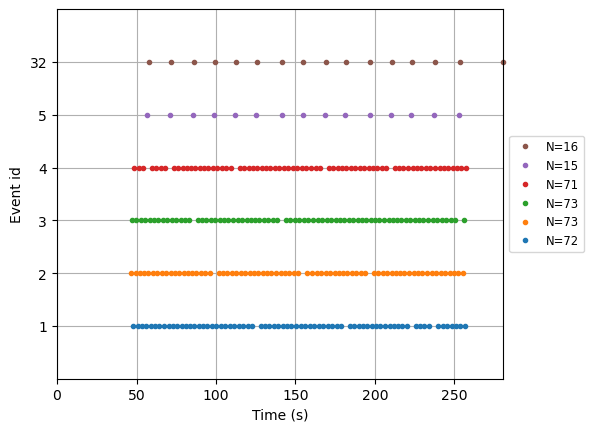

In [12]:
mne.viz.plot_events(events, sfreq=cleaned_raw.info['sfreq']);

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

How did the paradigm work?

visual and auditory stimuli were presented and randomly smileys appeared on the screen

What was the participants task? 

participants had to press a button when they saw a smiley on the screen

</div>

# create epochs based on events

In [18]:
epochs = mne.Epochs(cleaned_raw, events, event_mapping, tmin=-1, tmax=1, baseline=(None, None), preload=True)

Not setting metadata
320 matching events found
Setting baseline interval to [-1.0006410259015925, 1.0006410259015925] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 320 events and 1203 original time points ...
0 bad epochs dropped


In [5]:
# for those using MNE version 1.7.1 or higher you can create epochs directly from annotations 
# (if you have annotations in your data)
# epochs = mne.Epochs(cleaned_raw, tmin=-1, tmax=1, preload=True)

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Extract the first epoch for left auditory stimuli
</div>

In [15]:
left_audit_epochs = epochs['LA'][0]

<div class="alert alert-block alert-success">
<b>Exercise:</b>  
Get all epochs that contained an auditory stimulus
</div>

In [16]:
both_audit_epochs = epochs['LA', 'RA']

### Let's plot our first Event related potential (ERP)
average over auditory epochs

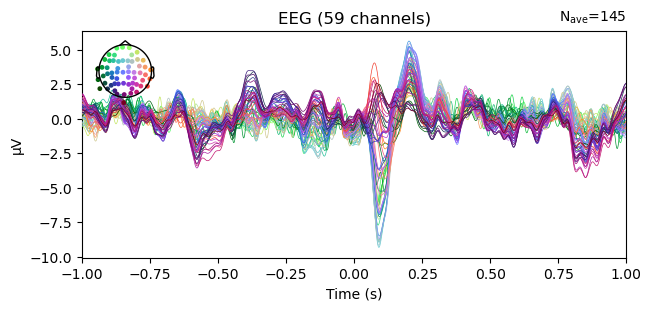

In [17]:
evoked_auditory = both_audit_epochs.average().plot();

In [19]:
# let's compare the evokeds before and after cleaning
epochs_raw = mne.Epochs(raw, events, event_mapping, tmin=-1, tmax=1, baseline=(None, None), preload=True)
# let's get both
both_audit_epochs_raw = epochs_raw['LA', 'RA']

Not setting metadata
320 matching events found
Setting baseline interval to [-1.0006410259015925, 1.0006410259015925] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 320 events and 1203 original time points ...
0 bad epochs dropped


<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Plot both evoked plots next to each other in one figure. 

Add titles so we know which plot is before and which is after cleaning.
</div>

Text(0.5, 1.0, 'after ica')

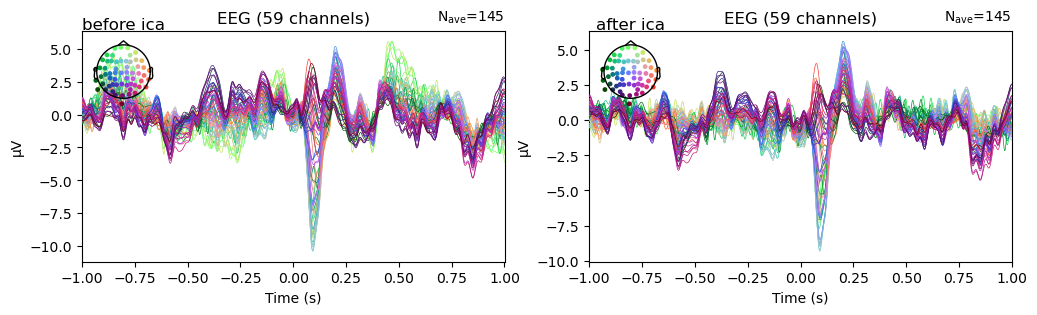

In [22]:
fig, ax = plt.subplots(1, 2, figsize=[12, 3])

both_audit_epochs_raw.average().plot(axes=ax[0], show=False);
plt.title('before ica')
both_audit_epochs.average().plot(axes=ax[1], show=False);
plt.title('after ica')

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

How and where do the plots differ?

the plot before ICA shows strong activity in frontal channels (green) which is most likely eye-movement
related artifacts

</div>

<div class="alert alert-block alert-info">
<b>Bonus:</b> 

Let's get rid of the remaining noisy segments using autoreject.

</div>

In [54]:
# not part of MNE, so has to be imported
from autoreject import AutoReject

ar = AutoReject(n_interpolate=[1, 2, 4],
                random_state=42,
                picks=mne.pick_types(epochs.info, 
                                     eeg=True,
                                     eog=False
                                    ),
                n_jobs=-1, 
                verbose=False
                )

epochs_clean, reject_log_clean = ar.fit_transform(epochs, return_log=True)

epochs_clean

### Caution: depending on the number of epochs, channels and the lenght of the epochs this might take a wile 

### => Patience, plus short coffee break 

In [ ]:
# what did we remove?
fig, ax = plt.subplots(figsize=[10, 4])
reject_log_clean.plot('horizontal', aspect='auto', ax=ax)
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Plot both evoked plots next to each other in one figure. 

Add titles so we know which plot is before and which is after autoreject cleaning.
</div>

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=[12, 3])

epochs['LA', 'RA'].average().plot(axes=ax[0], show=False); # remember the semicolon prevents a duplicated plot
plt.title('before autoreject cleaning')
epochs_clean['LA', 'RA'].average().plot(axes=ax[1], show=False);
plt.title('after autoreject cleaning')

Text(0.5, 1.0, 'after autoreject cleaning')

## Topomaps

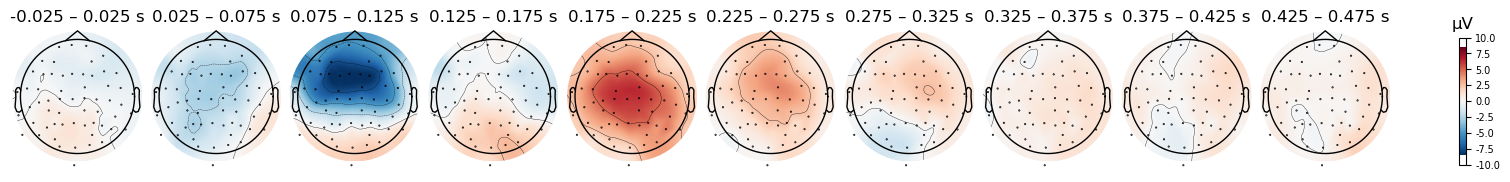

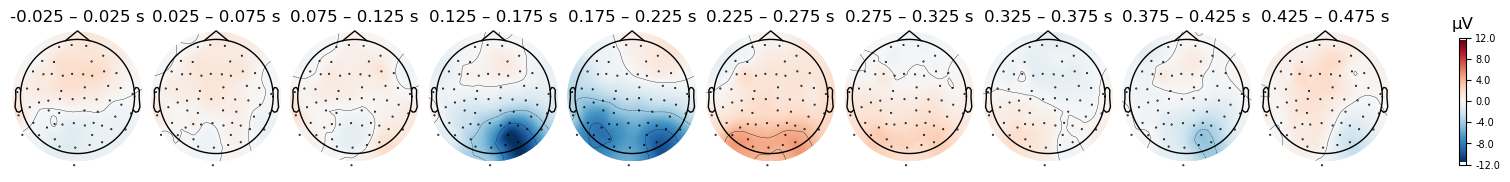

In [24]:
# Specify times to plot at, as [min],[max],[stepsize]
times = np.arange(0, 0.5, 0.05)

epochs['LA'].average().plot_topomap(times=times, average=0.050);
epochs['LV'].average().plot_topomap(times=times, average=0.050);

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

Do the topoplots differ? 

Yes

Do you expect them to differ?

Yes, we look at visual and auditory evoked responses, they should be in different regions 

</div>

In [ ]:
# Don't forget to save the cleaned epochs
epochs_clean.save(Path(data_dir, 'clean-after_autoreject-epo.fif'), overwrite=True)

## Re-referencing 
### or in other words: what are we actually measuring?

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

electrical potentials are always a relative measure, but relative to what?

relative to the reference electrode, all eeg channels are compared to this reference channel
the signal from the reference channel is subtracted  from all other channels thus it has a value of zero
relative differences between channels remain the same 

how about choosing a reference on the floor?

bad idea, choosing a reference on the head allows you to get rid of electromagnetic signals from the environment, which are common to all channels

when do I have to choose the reference electrode?

before you compare conditions

</div>

In [25]:
# create evoked object for left auditory epochs
evoked_al = epochs['LA'].average()

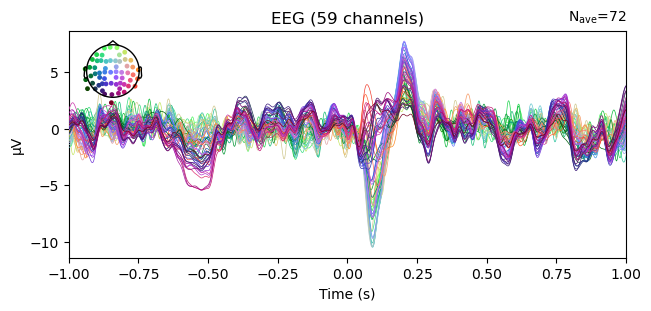

No projector specified for this dataset. Please consider the method self.add_proj.


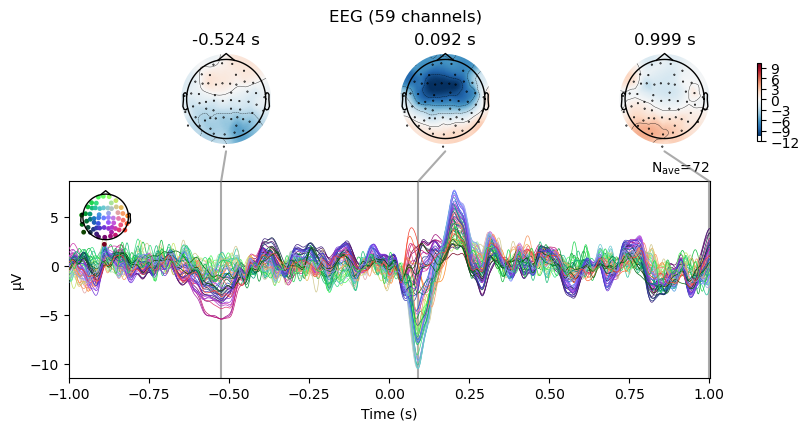

In [26]:
# always check the signal
evoked_al.plot();
evoked_al.plot_joint();

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


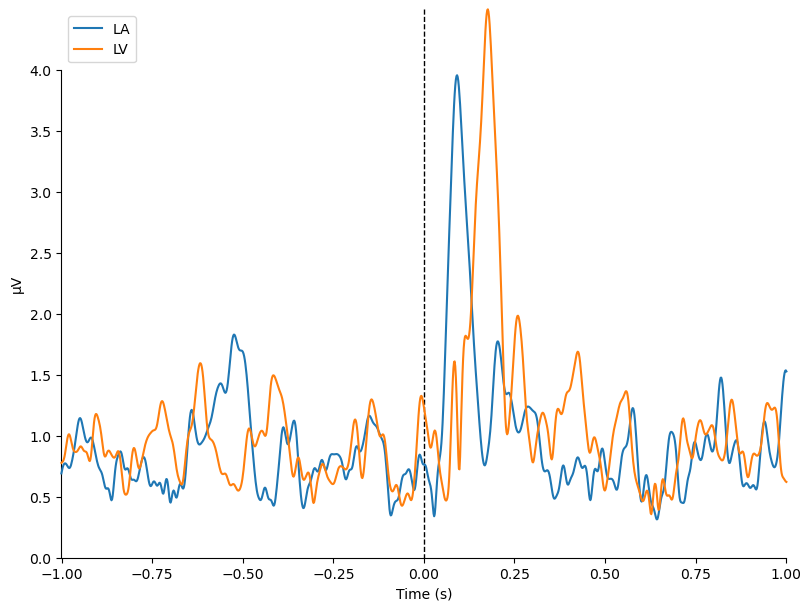

In [27]:
# Usually we want to compare conditions
evoked_lv = epochs['LV'].average()
mne.viz.plot_compare_evokeds([evoked_al, evoked_lv]);

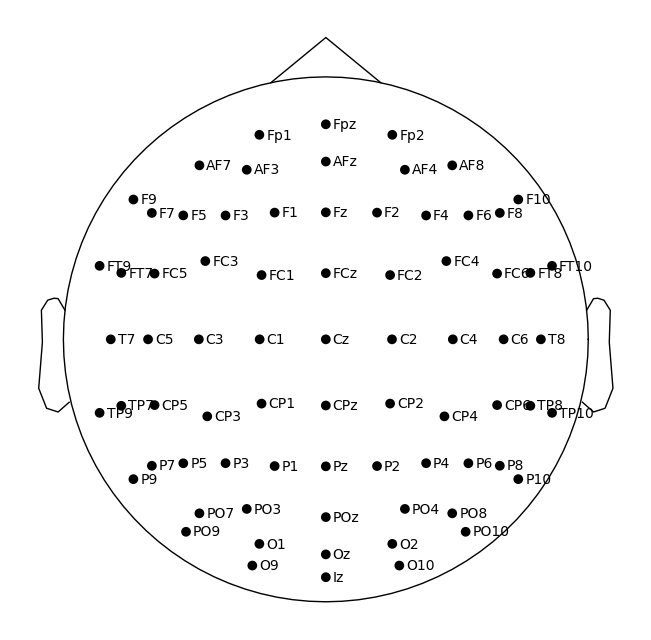

In [28]:
# add the standard montage for easycap-M1
std_montage = mne.channels.make_standard_montage("easycap-M1")
std_montage.plot();

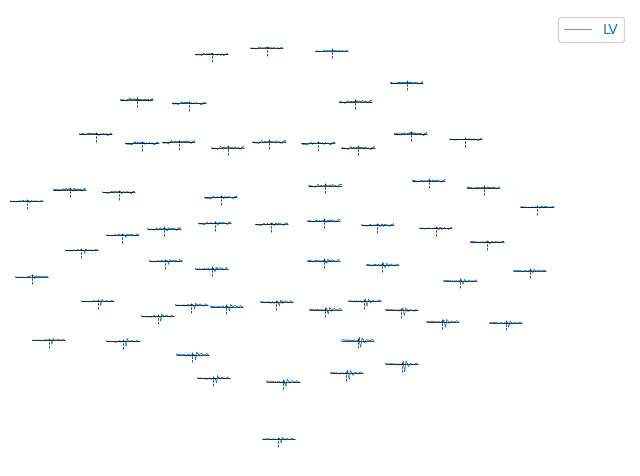

In [29]:
evoked_lv.plot_topo();

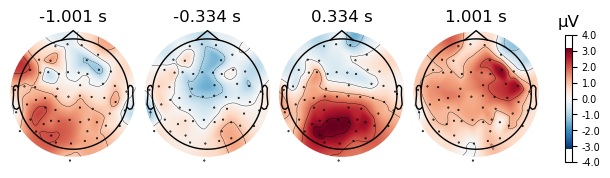

In [30]:
evoked_lv.plot_topomap();

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

Which reference did they use? 

We don't know, because we didn't collect the data. No channel is flat (zero), so probably average reference
or they already dropped the channel.


What to do if we don't know?

That's okey we can just re-reference the data after pre-processing.

</div> 

Average reference: the average potential across all electrodes is subtracted from each individual electrode

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


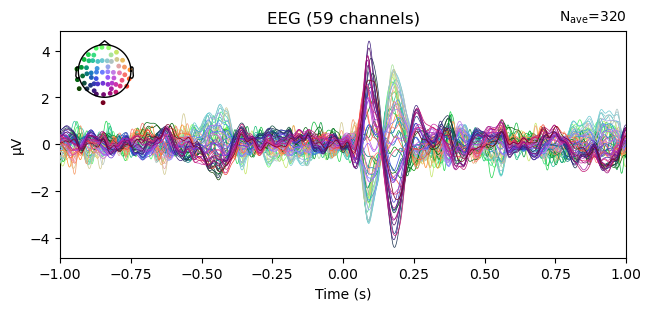

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


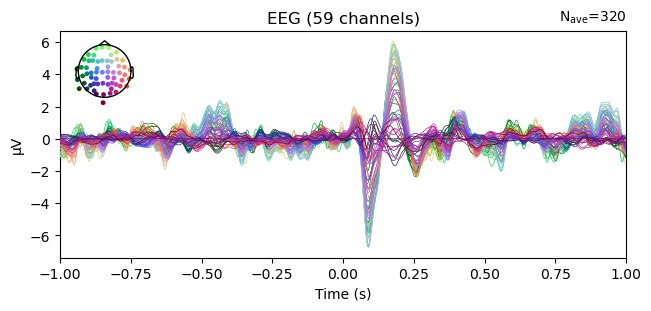

In [31]:
average_ref_epochs = epochs.copy().set_eeg_reference(ref_channels='average')
average_ref_epochs.average().plot();

# lets choose a visual channel as reference
epochs_occ = epochs.copy().set_eeg_reference(ref_channels=['EEG 058'])
epochs_occ.average().plot();

In [ ]:
# save the average re-referenced epochs
average_ref_epochs.save(Path(data_dir, 'average_ref-epo.fif'), overwrite=True)

Check out [this page](https://neuraldatascience.io/7-eeg/erp_avg_reref.html) on re-referencing and the effects of different reference electrodes on the ERPs 

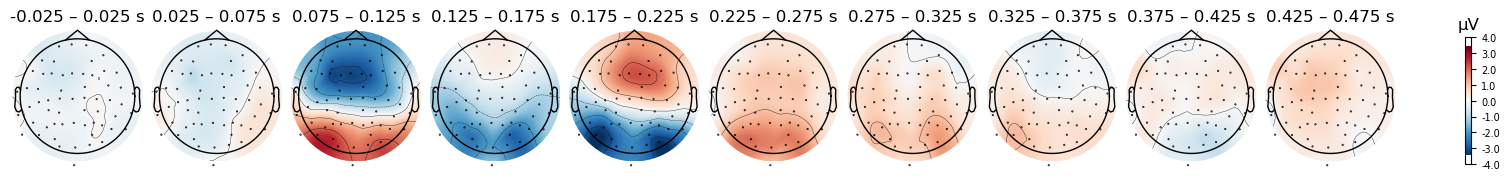

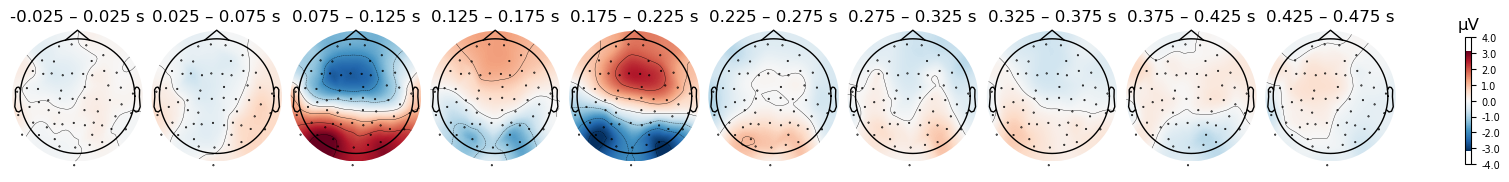

In [33]:
epochs.average().plot_topomap(times=times, average=0.050);
average_ref_epochs.average().plot_topomap(times=times, average=0.050);

<div class="alert alert-block alert-success">
<b>Exercise:</b>  


plot the re-referenced cleaned evoked contrast for left auditory vs left visual

plot the difference between the conditions

plot a shorter time window and a specific channel (you can choose which one)

</div>

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


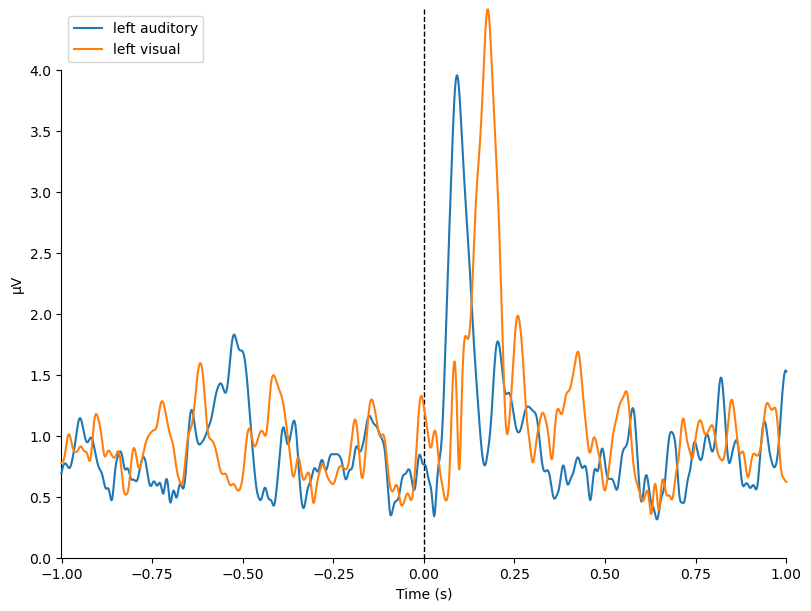

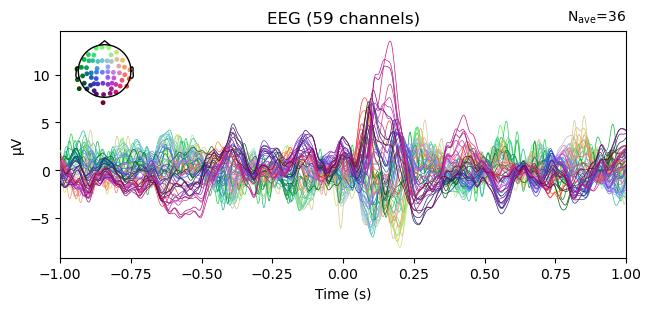

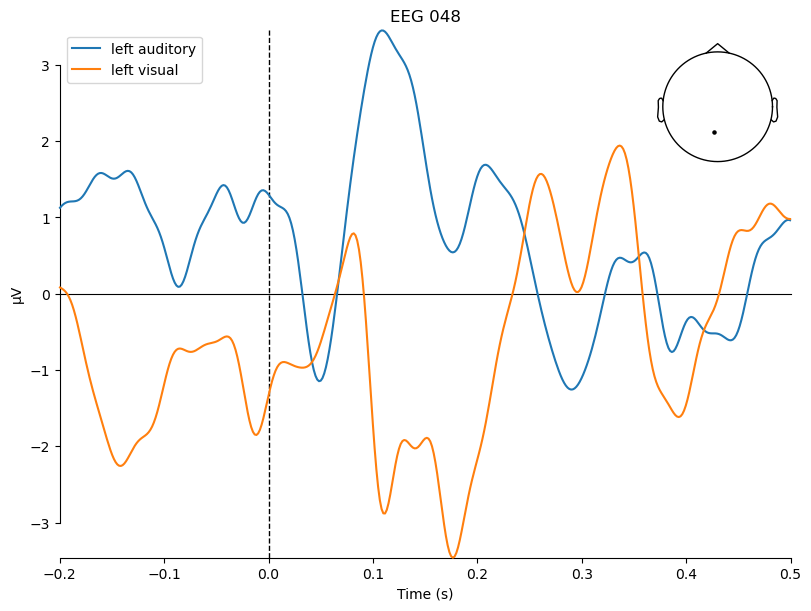

In [35]:
# create difference wave
evokeds_diff = mne.combine_evoked([average_ref_epochs['LA'].average(), 
                                   average_ref_epochs['LV'].average()
                                   ], 
                                  weights=[1, -1]
)

# plot both signals
mne.viz.plot_compare_evokeds({'left auditory': average_ref_epochs['LA'].average(), 
'left visual': average_ref_epochs['LV'].average()});

# plot the difference wave
evokeds_diff.plot();

# plot specific channel and shorter time window
mne.viz.plot_compare_evokeds({'left auditory': average_ref_epochs['LA'].average().copy().crop(-0.2,0.5),
 'left visual': average_ref_epochs['LV'].average().copy().crop(-0.2,0.5)}, picks=['EEG 048']);

### Take aways for re-referencing:

- a priori hypothesis of what ERP components and where the biggest difference potential should be

- re-referencing can't create a difference in the data that didn't exist before, it can only mask or unmask differences

- average reference is a safe option (can be done post data collection), but careful if you look at very broad ERPs (e.g. P300), average reference may attenuate the experimental effect


In [ ]:
# Bonus: try it out on liverpool data

# load the clean data
cleaned_raw = mne.io.read_raw_fif(Path(data_dir, 'liverpool_after_prepro_and_ica-raw.fif'))

# let's break the data into smaller chunks (epochs)
tstep = 3.0 # 3 second chunks
events = mne.make_fixed_length_events(cleaned_raw, duration=tstep)
epochs = mne.Epochs(cleaned_raw, events,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

from autoreject import AutoReject

ar = AutoReject(n_interpolate=[1, 2, 4],
                random_state=42,
                picks=mne.pick_types(epochs.info, 
                                     eeg=True,
                                     eog=False
                                    ),
                n_jobs=-1, 
                verbose=False
                )

epochs_clean, reject_log_clean = ar.fit_transform(epochs, return_log=True)

epochs_clean


Opening raw data file C:\Users\Carina\Desktop\data_liverpool\liverpool_after_prepro_and_ica-raw.fif...
    Range : 0 ... 313343 =      0.000 ...   611.998 secs
Ready.
Not setting metadata
204 matching events found
No baseline correction applied
0 projection items activated
Loading data for 204 events and 1537 original time points ...
1 bad epochs dropped
Dropped 15 epochs: 61, 69, 89, 98, 117, 120, 121, 128, 142, 168, 171, 172, 173, 174, 187


Number of events,188
Events,1: 188
Time range,0.000 – 3.000 s
Baseline,off


In [ ]:
evokeds = epochs.copy().crop(0,1).average().plot();

# average reference
average_ref_evokeds = epochs_clean.copy().set_eeg_reference(ref_channels='average').crop(0,1).average()

average_Fpz_evokeds = epochs_clean.copy().set_eeg_reference(ref_channels=['Fpz']).crop(0,1).average()

average_ref_evokeds.plot_topomap();
plt.title('average reference')
average_Fpz_evokeds.plot_topomap();
plt.title('Fpz reference')
plt.show()

epochs_Fpz = epochs_clean.set_eeg_reference(ref_channels=['Fpz']).save(Path(data_dir, 'liverpool_fpz_reference-epo.fif'))

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
